In [102]:
import numpy as np
from dolfin import *

# 2D mesh with nx and ny elements in the x and y directions, respectively
nx, ny = 100, 100
mesh = RectangleMesh(Point(0, 0), Point(1, 1), nx, ny)

# 2D NumPy array with sinusoidal function
x = np.linspace(0, 1, nx+1)
y = np.linspace(0, 1, ny+1)
X, Y = np.meshgrid(x, y)
numpy_array = np.sin(2*np.pi*X) * np.sin(2*np.pi*Y)

# Define a function space on the mesh
V = FunctionSpace(mesh, "P", 1)

# FEniCS Function to store the data
data_function = Function(V)

# Get the local to global DoF map
dof_map = vertex_to_dof_map(V)

# Copy the data from the NumPy array to the Function
for i in range(V.dim()):
    data_function.vector()[dof_map[i]] = numpy_array.flatten()[i]
#     print(data_function.vector()[dof_map[i]])

# # Print the values from the Function
# print("Data from FEniCS Function:")
# print(data_function.vector().get_local().reshape((nx + 1, ny + 1)))


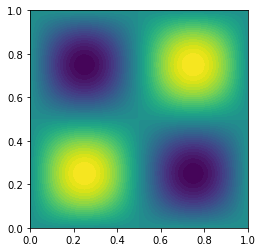

In [103]:
plot(data_function)

<ipython-input-109-96da9224585f>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(X, Y, numpy_array)


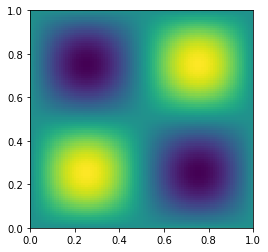

In [109]:
# NUMPY ARRAY
plt.figure(figsize = (4, 4))
plt.pcolor(X, Y, numpy_array)


In [97]:
dof_map

array([5050, 5151, 5251, ..., 4949, 5049, 5150], dtype=int32)

In [98]:
np.shape(numpy_array)

(101, 101)

In [99]:
V.dim()

10201